# A3: Decision Tree Classification and Evaluation
Alex Dien
09/13/22

# Table of Contents

# 1. Code chunk 1 - Set up, data import and inspection code for the following:

load libraries

In [175]:
# load packages

import pandas as pd
import numpy as np
import sklearn
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


import data

In [176]:
df = pd.read_csv("https://raw.githubusercontent.com/matthewpecsok/4482_fall_2022/main/data/CD_additional_balanced.csv")

Examine overall structure

In [177]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
1,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
2,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
3,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
4,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9280 entries, 0 to 9279
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9280 non-null   int64  
 1   job             9280 non-null   object 
 2   marital         9280 non-null   object 
 3   education       9280 non-null   object 
 4   default         9280 non-null   object 
 5   housing         9280 non-null   object 
 6   loan            9280 non-null   object 
 7   contact         9280 non-null   object 
 8   month           9280 non-null   object 
 9   day_of_week     9280 non-null   object 
 10  duration        9280 non-null   int64  
 11  campaign        9280 non-null   int64  
 12  pdays           9280 non-null   int64  
 13  previous        9280 non-null   int64  
 14  poutcome        9280 non-null   object 
 15  emp.var.rate    9280 non-null   float64
 16  cons.price.idx  9280 non-null   float64
 17  cons.conf.idx   9280 non-null   f

In [179]:
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,9280.000000,9280,9280,9280,9280,9280,9280,9280,9280,9280,...,9280.000000,9280.000000,9280.000000,9280,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280
unique,NaN,12,4,8,2,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,yes
freq,NaN,2517,5338,3007,7824,4951,7688,6672,2533,2000,...,NaN,NaN,NaN,7244,NaN,NaN,NaN,NaN,NaN,4640
mean,40.403448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.333297,887.282435,0.315302,NaN,-0.496272,93.479178,-40.218125,2.960209,5135.306487,NaN
std,12.062030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.334467,313.802415,0.700671,NaN,1.721204,0.634510,5.360642,1.890402,87.105317,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,92.893000,-42.700000,1.244000,5076.200000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,-0.100000,93.444000,-41.800000,4.021000,5191.000000,NaN
75%,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.959000,5228.100000,NaN


In [180]:
df.shape

(9280, 21)

Check for nulls

In [181]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# 2. Code Chunk 2 - Target variable

## A. show the count and the proportion of instances belonging to that class.

In [182]:
df.y.value_counts()

yes    4640
no     4640
Name: y, dtype: int64

In [183]:
df.y.value_counts(normalize=True)

yes    0.5
no     0.5
Name: y, dtype: float64

## B. The distribution of the target variable is evenly split 50/50. It is perfectly balanced.

String/object columns are already converted unlike numeric.

## C. Pop Target

In [184]:
y_target = df.pop('y')

# 3. Code Chunk 3 - Data preparation

## A. The categorical features are: job, marital, education,default, housing, loan, contact, month, day_of_week

## A. The quantitative features are: age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed

## B. Show the distributions value_counts() of each categorical predictor.

In [185]:
df.job.value_counts()

admin.           2517
blue-collar      1769
technician       1459
services          773
management        651
retired           595
student           358
entrepreneur      308
self-employed     306
unemployed        248
housemaid         216
unknown            80
Name: job, dtype: int64

In [186]:
df.marital.value_counts()

married     5338
single      2900
divorced    1021
unknown       21
Name: marital, dtype: int64

In [187]:
df.education.value_counts()

university.degree      3007
high.school            2102
professional.course    1190
basic.9y               1177
basic.4y                895
basic.6y                458
unknown                 445
illiterate                6
Name: education, dtype: int64

In [188]:
df.default.value_counts()

no         7824
unknown    1456
Name: default, dtype: int64

In [189]:
df.housing.value_counts()

yes        4951
no         4104
unknown     225
Name: housing, dtype: int64

In [190]:
df.loan.value_counts()

no         7688
yes        1367
unknown     225
Name: loan, dtype: int64

In [191]:
df.contact.value_counts()

cellular     6672
telephone    2608
Name: contact, dtype: int64

In [192]:
df.month.value_counts()

may    2533
jul    1477
aug    1353
jun    1169
nov     886
apr     785
oct     369
mar     313
sep     295
dec     100
Name: month, dtype: int64

In [193]:
df.day_of_week.value_counts()

thu    2000
wed    1861
mon    1846
tue    1810
fri    1763
Name: day_of_week, dtype: int64

In [194]:
df.poutcome.value_counts()

nonexistent    7244
failure        1074
success         962
Name: poutcome, dtype: int64

## C. Convert to category

In [195]:
# convert category features to categorical

df = df.astype({'job': 'category',
                'marital': 'category',
                'education': 'category',
                'default': 'category',
                'housing': 'category',
                'loan': 'category',
                'contact': 'category',
                'month': 'category',
                'day_of_week': 'category',
                'poutcome': 'category'})

In [196]:
# check data types
df.dtypes

age                  int64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
dtype: object

## D. Transform df to one-hot encoded df

In [197]:
# use pandas get_dummies to one hot encode 
# rename as encoded to know it is encoded
df_encoded_X = pd.get_dummies(df)

In [198]:
df_encoded_X1 = pd.get_dummies(df)

## E. Check if one-hot encoding was successful

In [199]:
df_encoded_X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,41,1575,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,49,1042,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,49,1467,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,41,579,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,45,461,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


# 4. Code chunk 4 – Train and Evaluate Simple Decision Tree 1 to classify y

## A. Fit sklearn tree model

In [200]:
# create decision tree. ccp_alpha param allows use to change the size of the tree. in this model, we change it to 2 leaf nodes.
tree_model_1 = tree.DecisionTreeClassifier(random_state=42, ccp_alpha=.10)

In [201]:
# fitting process. first argument is a dataset of the predictors. second is a series of the target (y variable).
tree_model_1 = tree_model_1.fit(df_encoded_X, y_target) # trains the model on x and y data

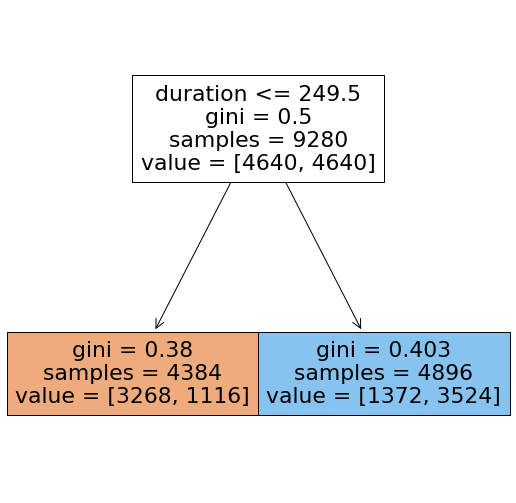

In [202]:
# plot tree
fig = plt.figure(figsize=(9,9))
_ = tree.plot_tree(tree_model_1,
                   feature_names=df_encoded_X.columns.to_list(),
                   filled=True)

## B. Explain which predictor is the root of the tree and what the splitting value is. For each of these values tell the prediction the model would give if using this node. (for example if the root was age the split might be Age <= 25.0. If the left node was then predicted to Survive write Age<=25 Predict = Survived, Age> 25 Predict = Did not Survive.

The root of the tree is the top node which all the child nodes inherit. In this tree, the predictor is duration. The splitting value is Duration<=249.5. 

## C. The model has made half as many mistakes by splitting on the Root node predictor rather than generalizing it because like the name says, it splits it 50/50.
e.g., Root node is 9 wins, and 5 losses. 3 child nodes split off as A, B, and C. Node A has 3 wins, 1 loss, Node B has 2 wins, 0 losses, and Node C has 4 wins and 4 losses.

## D. Entropy is measured from 0 to 1. The higher the number, the more disordered (impure) it is. This means the set is highly disordered. In this case, gini of 0.5 is equivalent to entropy of 1 which means the data collection is the most extreme uncertainty level.

In [203]:
# create a new model 2
tree_model_2 = tree.DecisionTreeClassifier(random_state=42,ccp_alpha=0.02)
tree_model_2

# note, there is a lot going on behind the scenes here fitting is a complex process
tree_model_2 = tree_model_2.fit(df_encoded_X,y_target) # this trains the model on the x and y data 

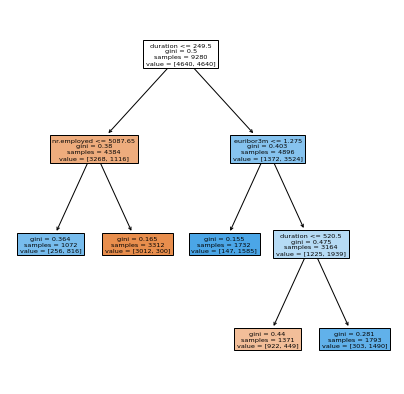

In [204]:
fig = plt.figure(figsize=(7,7))
_ = tree.plot_tree(tree_model_2,
                   feature_names=df_encoded_X.columns.to_list(), # make sure the feature names are in output
                   filled=True) # filled true color codes by the class. shading indicates proportion or quality of split

In [205]:
# create a new model 2
tree_model_3 = tree.DecisionTreeClassifier(random_state=42,ccp_alpha=0.0002)
tree_model_3

# note, there is a lot going on behind the scenes here fitting is a complex process
tree_model_3 = tree_model_3.fit(df_encoded_X,y_target) # this trains the model on the x and y data 

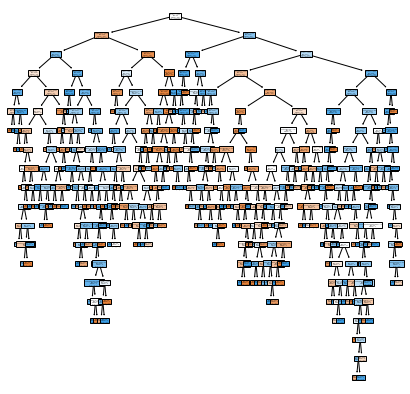

In [206]:
fig = plt.figure(figsize=(7,7))
_ = tree.plot_tree(tree_model_3,
                   feature_names=df_encoded_X.columns.to_list(), # make sure the feature names are in output
                   filled=True) # filled true color codes by the class. shading indicates proportion or quality of split

## E. Predict using predict function

In [207]:
model_1_pred = tree_model_1.predict(df_encoded_X)

print(model_1_pred[0:10])
print(model_1_pred.shape)

['yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes']
(9280,)


In [208]:
# Use confusion matrix from sklearn to generate confusion matrices
model_1_cf = confusion_matrix(y_true=y_target, y_pred=model_1_pred)
model_1_cf # shows misclassifications

array([[3268, 1372],
       [1116, 3524]])

In [209]:
# performance of tree_model_1
# use metrics to compare across models

print(metrics.classification_report(y_target, tree_model_1.predict(df_encoded_X)))

              precision    recall  f1-score   support

          no       0.75      0.70      0.72      4640
         yes       0.72      0.76      0.74      4640

    accuracy                           0.73      9280
   macro avg       0.73      0.73      0.73      9280
weighted avg       0.73      0.73      0.73      9280



# 5. Code chunk 5 – Train and Evaluate more complex Decision Tree 2 to classify y

## A. Fit a simplified version of Decision Tree 1 by adjusting the ccp_alpha of Decision Tree 1

In [210]:
tree_model_simp = tree.DecisionTreeClassifier(random_state=42, ccp_alpha=0.01)
tree_model_simp = tree_model_simp.fit(df_encoded_X, y_target)

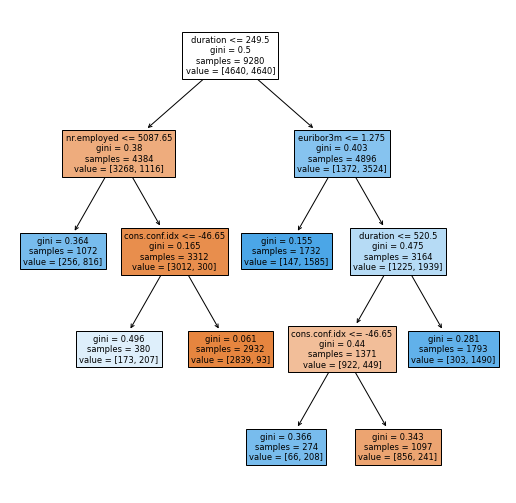

In [211]:
# simplified plot
fig = plt.figure(figsize=(9,9))
_ = tree.plot_tree(tree_model_simp,
                   feature_names=df_encoded_X.columns.to_list(),
                   filled=True)

## B. Predict on the simplified model, and generate reports

In [212]:
# predict on the new simplified model
model_2_pred = tree_model_simp.predict(df_encoded_X)

print(model_2_pred[0:10])
print(model_2_pred.shape)

['yes' 'yes' 'yes' 'yes' 'no' 'yes' 'yes' 'yes' 'yes' 'yes']
(9280,)


In [213]:
model_2_cf = confusion_matrix(y_true=y_target, y_pred=model_1_pred)
model_2_cf # shows misclassifications

array([[3268, 1372],
       [1116, 3524]])

In [214]:
# performance of tree_model_simp
# use metrics to compare across models

print(metrics.classification_report(y_target, tree_model_simp.predict(df_encoded_X)))

              precision    recall  f1-score   support

          no       0.92      0.80      0.85      4640
         yes       0.82      0.93      0.87      4640

    accuracy                           0.86      9280
   macro avg       0.87      0.86      0.86      9280
weighted avg       0.87      0.86      0.86      9280



# 6. Code chunk 6 – Duration Removed Decision Tree 3 to predict y

## A. Remove the variable - duration

In [215]:
df_encoded_X.pop('duration')

0       1575
1       1042
2       1467
3        579
4        461
        ... 
9275     115
9276      92
9277      65
9278     124
9279     170
Name: duration, Length: 9280, dtype: int64

In [216]:
tree_model_3 = tree.DecisionTreeClassifier(random_state=42,ccp_alpha=0.001)


## B. fit a model to classify y

In [217]:
tree_model_3 = tree_model_3.fit(df_encoded_X,y_target) # this trains the model on the x and y data 

## Plot model

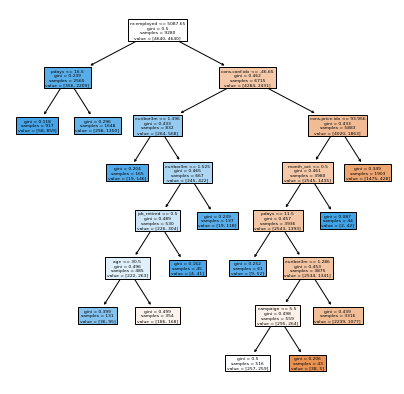

In [218]:
fig = plt.figure(figsize=(7,7))
_ = tree.plot_tree(tree_model_3,
                   feature_names=df_encoded_X.columns.to_list(), # make sure the feature names are in output
                   filled=True) # filled true color codes by the class. shading indicates proportion or quality of split

## D. Predict

In [219]:
model_3_pred = tree_model_3.predict(df_encoded_X)

In [220]:
# Use confusion matrix from sklearn to generate confusion matrices
model_3_cf = confusion_matrix(y_true=y_target, y_pred=model_3_pred)
model_3_cf # shows misclassifications

array([[3938,  702],
       [1678, 2962]])

In [221]:
# performance of tree_model_3
# use metrics to compare across models

print(metrics.classification_report(y_target, tree_model_3.predict(df_encoded_X)))

              precision    recall  f1-score   support

          no       0.70      0.85      0.77      4640
         yes       0.81      0.64      0.71      4640

    accuracy                           0.74      9280
   macro avg       0.75      0.74      0.74      9280
weighted avg       0.75      0.74      0.74      9280



## E. Explain if the model performance has gone up or down. Why would removing duration cause this change to occur?

The performance increases after pruning. It removes the branch that make use of features that are irrelevant.

# 7. Describe and compare the three models 

Model 1: Accuracy/f1-score: **0.84**
Model 2: Accuracy/f1-Score: **0.86**
Model 3: Accuracy/f1-score: **0.74**

f1 score is the percentage of correct predictions that the model made. The higher the score, the better. Some models do better than the others because we manipulated the ccp_alpha, which changes the size of nodes(leaves) of the tree. Pruning is a technique where we reduce the size of decision trees by removing unnecessary columns to improve performance. This helps to prevent overfitting, which is when the tree is designed to cater to all samples in the training data set.

In [224]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [223]:
!cp "/content/drive/My Drive/Colab Notebooks/A3_Dien_Alex.ipynb" ./

# create html from ipynb
!jupyter nbconvert --to html "A3_Dien_Alex.ipynb"

[NbConvertApp] Converting notebook A3_Dien_Alex.ipynb to html
[NbConvertApp] Writing 440767 bytes to A3_Dien_Alex.html
